#  PROJECT-1                                
>## CLUSTERING
>>### **BY SAUMYA GUPTA(18CSU195)**

**Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups**

### STEPS :

1. Perform Data Pre-processing and Data Visualization on your data set to develop a thorough understanding of the data. (5)

2. Apply k-means clustering technique after identifying the best k value. (5)

3. Apply hierarchical clustering on the dataset and display the dendrogram. (5)

4. Apply any two performance measures and give your analysis. (5)


## Private , government and semi government universities acceptance dataset

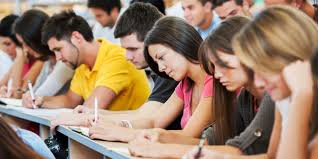

This dataset consists of **777** observations on the following **17** columns (features):

  

  - **Apps**: Number of applications received

  - **Accept**: Number of applications accepted

  - **Enroll**: Number of new students enrolled

  - **Top10perc**: Pct. new students from top 10% of H.S. class

  - **Top25perc**: Pct. new students from top 25% of H.S. class

  - **F.Undergrad**: Number of fulltime undergraduates

  - **P.Undergrad**: Number of parttime undergraduates

  - **Outstate**: Out-of-state tuition

  - **Room.Board**: Room and board costs

  - **Books**: Estimated book costs

  - **Personal**: Estimated personal spending

  - **PhD**: Pct. of faculty with Ph.D.’s

  - **Terminal**: Pct. of faculty with terminal degree

  - **S.F.Ratio**: Student/faculty ratio

  - **perc.alumni**: Pct. alumni who donate

  - **Expend**: Instructional expenditure per student

  - **Grad.Rat**e: Graduation rate


### For this project I will attempt to use Clustering to cluster Universities into three groups, Private Government and semi government universities

In [98]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [99]:
#read dataset
df = pd.read_csv('college1.csv')

In [6]:
#to display first 5 rows of dataset
df.head()

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [7]:
#to display last 5 rows of dataset
df.tail()

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99
776,2989,1855,691,28,63,2988,1726,4990,3560,500,1250,75,75,18.1,28,4509,99


# DATA  PREPROCESSING

In [8]:
# to print a concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   apps         777 non-null    int64  
 1   accept       777 non-null    int64  
 2   enroll       777 non-null    int64  
 3   top10perc    777 non-null    int64  
 4   top25perc    777 non-null    int64  
 5   f_undergrad  777 non-null    int64  
 6   p_undergrad  777 non-null    int64  
 7   outstate     777 non-null    int64  
 8   room_board   777 non-null    int64  
 9   books        777 non-null    int64  
 10  personal     777 non-null    int64  
 11  phd          777 non-null    int64  
 12  terminal     777 non-null    int64  
 13  s_f_ratio    777 non-null    float64
 14  perc_alumni  777 non-null    int64  
 15  expend       777 non-null    int64  
 16  grad_rate    777 non-null    int64  
dtypes: float64(1), int64(16)
memory usage: 103.3 KB


In [9]:
#to compute a summary of statistics pertaining to the DataFrame columns such as mean, std and IQR values.
df.describe()

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [10]:
df.shape

(777, 17)

In [11]:
#checking for null values
df.isnull().sum()

apps           0
accept         0
enroll         0
top10perc      0
top25perc      0
f_undergrad    0
p_undergrad    0
outstate       0
room_board     0
books          0
personal       0
phd            0
terminal       0
s_f_ratio      0
perc_alumni    0
expend         0
grad_rate      0
dtype: int64

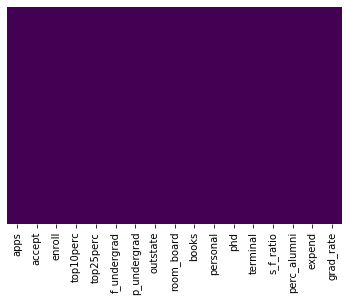

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

> **This shows that there are no null values in the dataset**

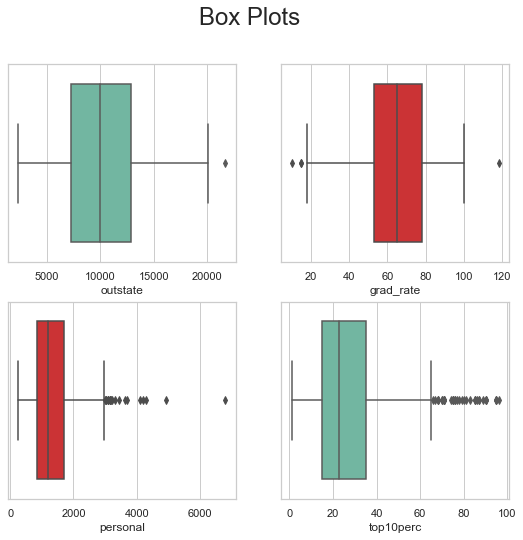

In [103]:
#Plotting boxplot (displaying the distribution of data based on a five number summary )
sns.set(style="whitegrid")
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
plt.suptitle('Box Plots',fontsize=24)
sns.boxplot(x="outstate", data=df,ax=ax[0,0],palette='Set2')
sns.boxplot(x="grad_rate", data=df,ax=ax[0,1],palette='Set1')
sns.boxplot (x ='personal', data=df, ax=ax[1,0], palette='Set1')
sns.boxplot(x='top10perc', data=df, ax=ax[1,1],palette='Set2')
plt.show()

> **The median (middle quartile) marks the mid-point of the graduation rate(around 65) and is shown by the line that divides the box into two parts. Dots on either side represent the outliers**

# EXPLORATORY DATA ANALYSIS

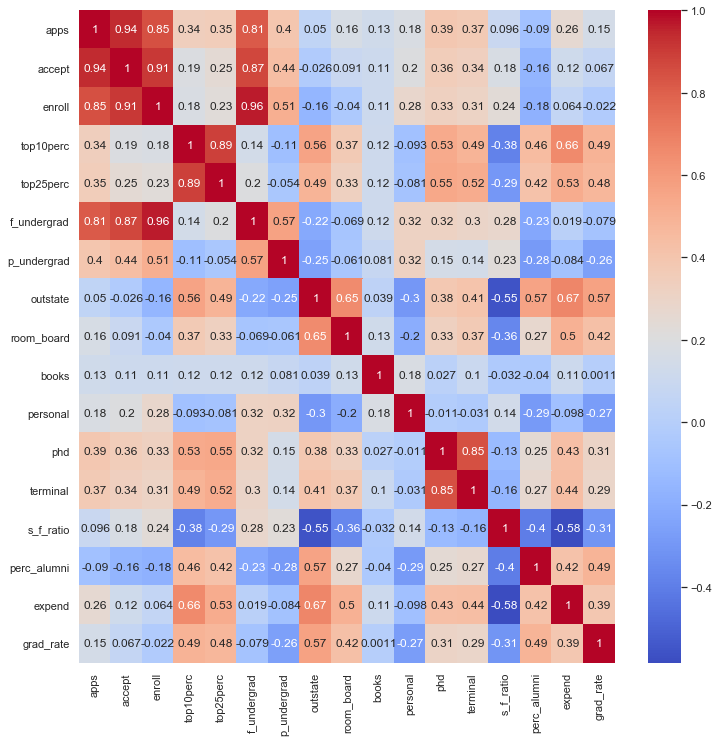

In [14]:
# plotting heatmap to find correlation between attributes
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

**INFERENCE**:
> #### Attributes having highest correlation(0.96) are f_undergrad and enroll.

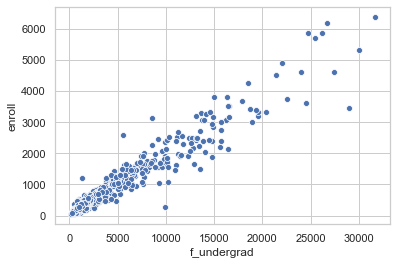

In [15]:
#scatter plot
sns.scatterplot(x='f_undergrad', y='enroll', data=df)

**INFERENCE**
>  **It can be seen that f_undergrad(no of full tym undergraduates) and enroll(no of new students enrolled) follows a kind of linear relationship i.e., if one increases the other also increases and vice versa**

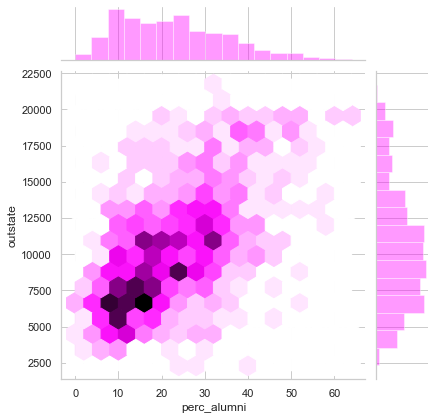

In [16]:
#joint plot + histogram
sns.jointplot(x="perc_alumni",y="outstate",data=df,kind="hex",color="magenta")

**INFERENCE:**
> **In this plot, the hexagon with most number of points gets darker color. So it can be infered that the percentage of alumni who donate(perc_alumni) the most is between 10-20% and the corresponding no of Out-of-state tuitions for the same are around 7000**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D044CDF648>,
      dtype=object)

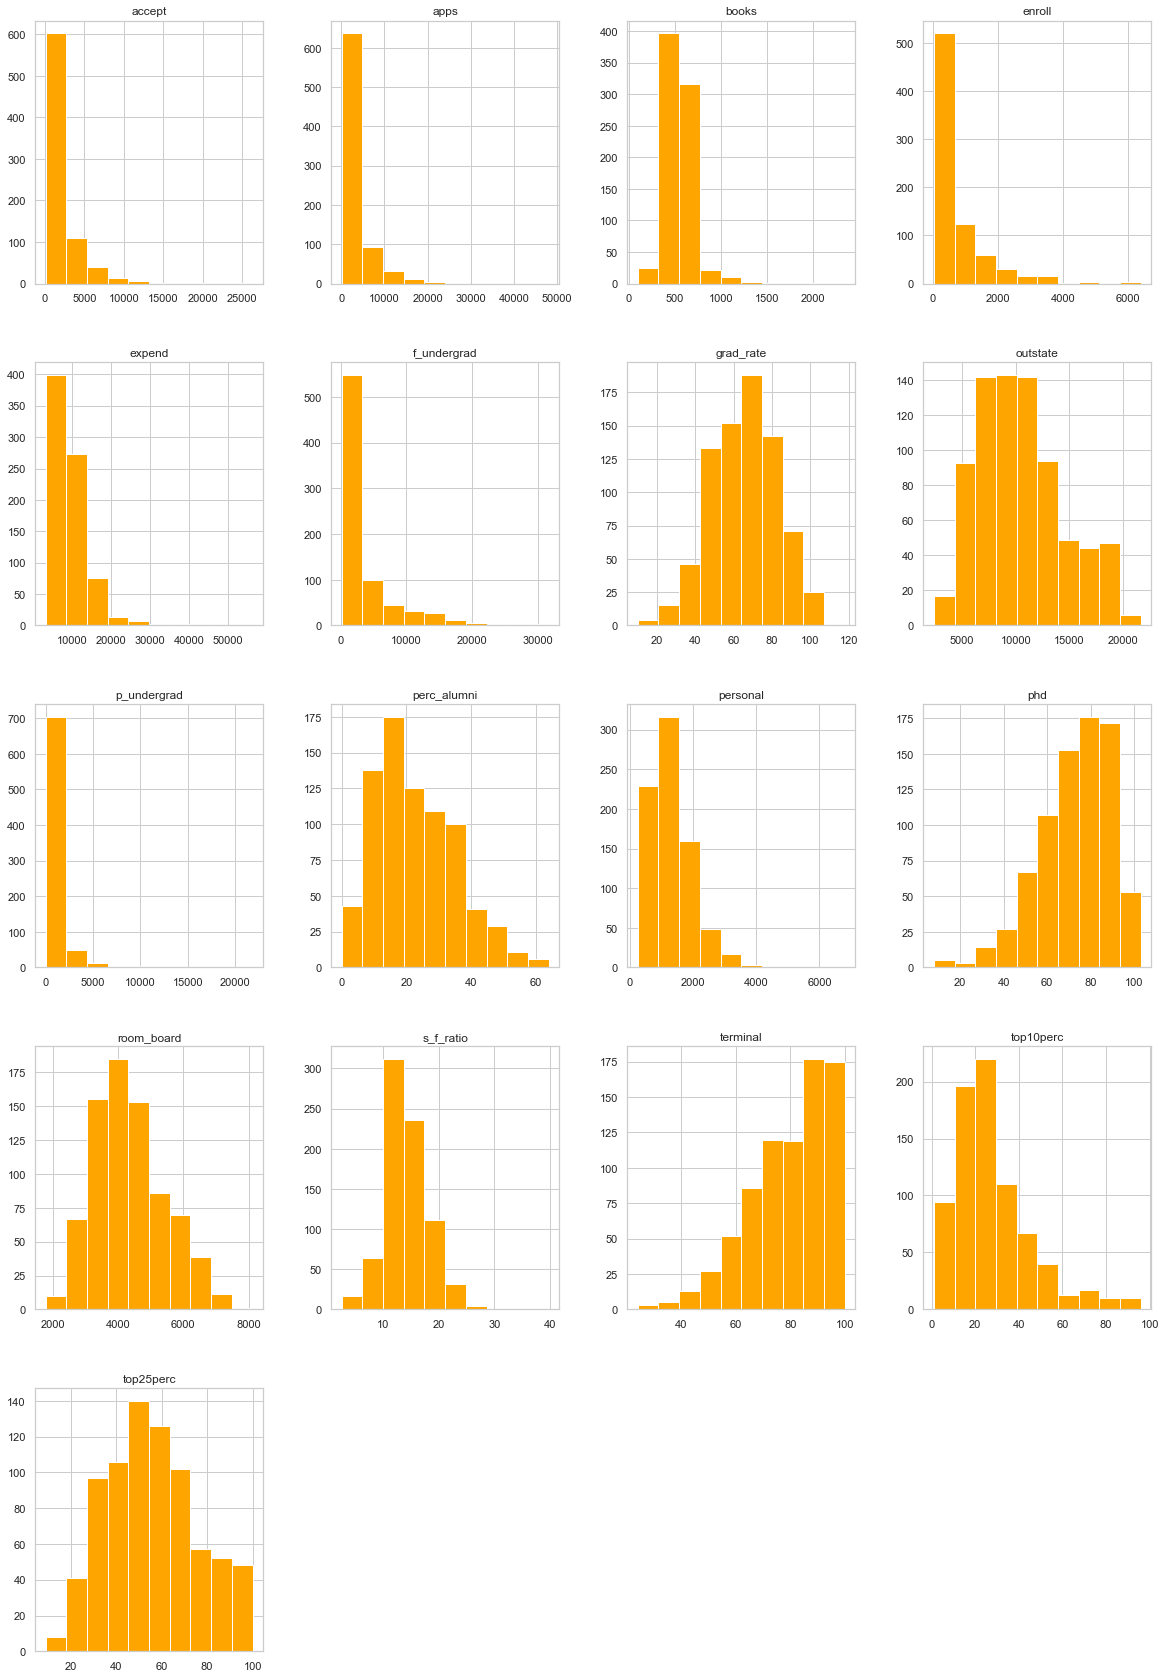

In [17]:
#plotting histogram
df.hist(figsize=(20,30),color="orange")

> **It shows the distribution of various attributes in the dataset**

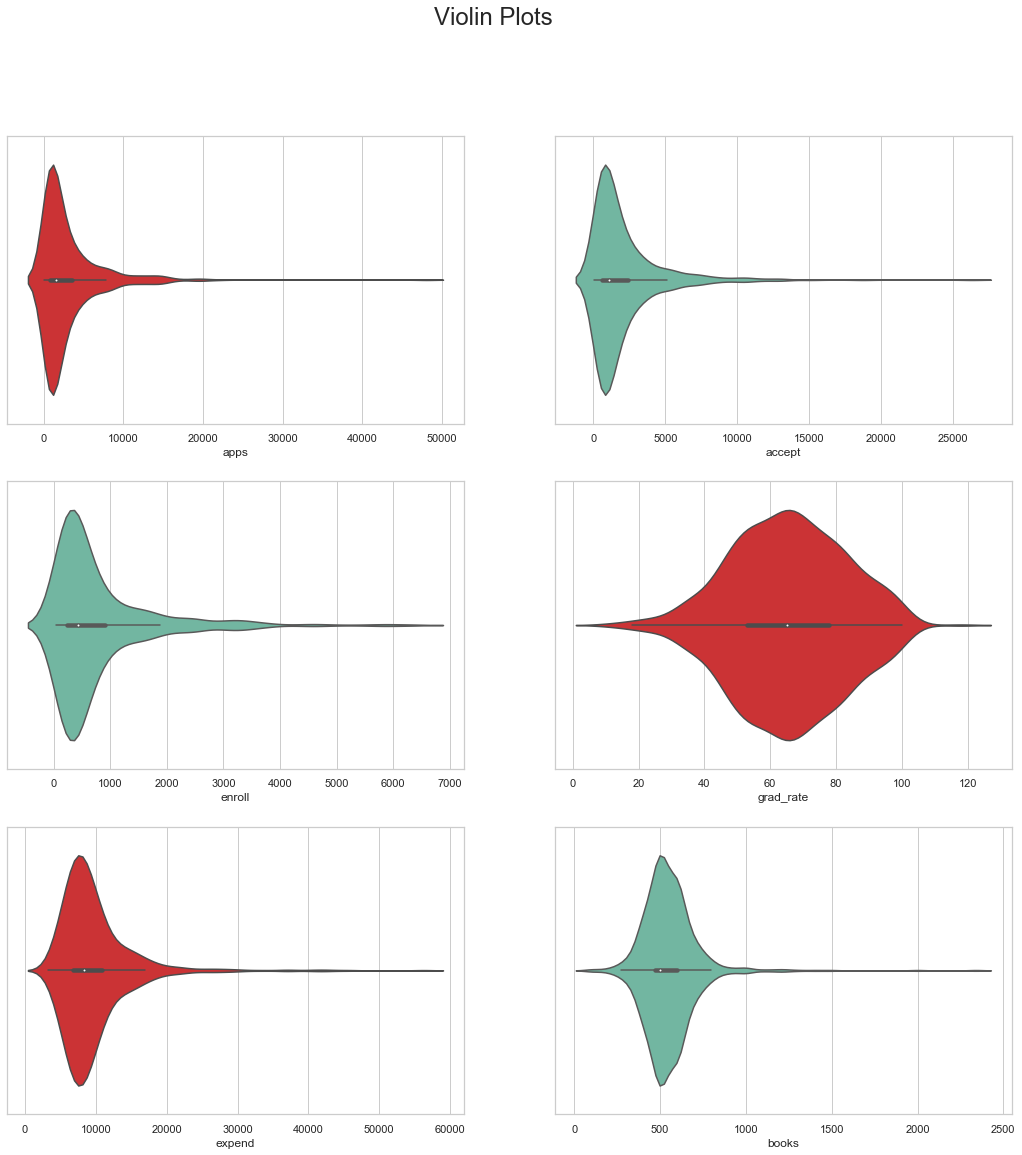

In [18]:
#plotting violin plots to visualise the distribution of the data and its probability density
fig,ax = plt.subplots(nrows=3, ncols=2, figsize=(18,18))
plt.suptitle('Violin Plots',fontsize=24)
sns.violinplot(x="apps", data=df,ax=ax[0,0],palette="Set1")
sns.violinplot(x="accept", data=df,ax=ax[0,1],palette="Set2")
sns.violinplot (x ='enroll', data=df, ax=ax[1,0],palette="Set2")
sns.violinplot(x='grad_rate', data=df, ax=ax[1,1],palette="Set1")
sns.violinplot(x='expend', data=df, ax=ax[2,0],palette="Set1")
sns.violinplot(x='books', data=df, ax=ax[2,1],palette="Set2")
plt.show()

> **The white dot in the middle is the median value and the thick black bar in the centre represents the interquartile range. The thin black line extended from it represents the upper (max) and lower (min) adjacent values in the data.**

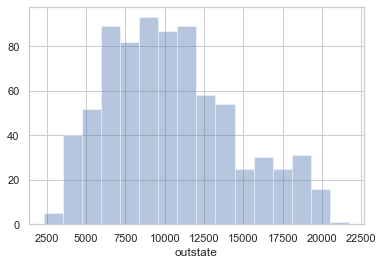

In [19]:
#plotting univariate distribution(distplot)
sns.distplot(df['outstate'],kde=False)

**INFERENCE**
> **This shows the count of different outstate values present in the dataset and it can be infered that most of the outstate values are between 6000-12000**

## K Means clustering

In [3]:
from sklearn.cluster import KMeans

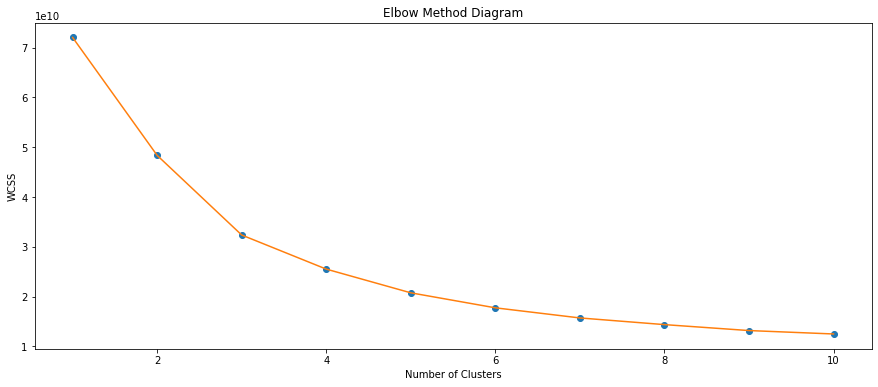

In [12]:
# Using the elbow method to find the optimal number of clusters
X = df.iloc[: , :].values      #taking all the columns into account
wcss = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300))
    algorithm.fit(X)
    wcss.append(algorithm.inertia_)
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , wcss , 'o')
plt.plot(np.arange(1 , 11) , wcss , '-' )
plt.xlabel('Number of Clusters') , plt.ylabel('WCSS')
plt.title('Elbow Method Diagram')
plt.show()



**optimal no of clusters are 3**

In [13]:
# Fitting K-Means to the dataset
algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 823) )
algorithm.fit(X)
labels = algorithm.labels_

In [14]:
df['Cluster'] = labels
df.tail(10)

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate,Cluster
767,2320,1805,769,24,61,3395,670,6400,3392,580,2150,71,80,12.8,26,6729,59,2
768,152,128,75,17,41,282,22,9100,3700,500,1400,48,48,8.5,26,8960,50,2
769,1979,1739,575,42,68,1980,144,15948,4404,400,800,82,95,12.8,29,10414,78,2
770,1501,935,273,51,83,1059,34,12680,4150,605,1440,91,92,15.3,42,7875,75,2
771,2768,2314,682,49,86,2802,86,15884,5370,530,730,92,94,15.2,34,10774,82,1
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,2
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,2
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,2
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1
776,2989,1855,691,28,63,2988,1726,4990,3560,500,1250,75,75,18.1,28,4509,99,2


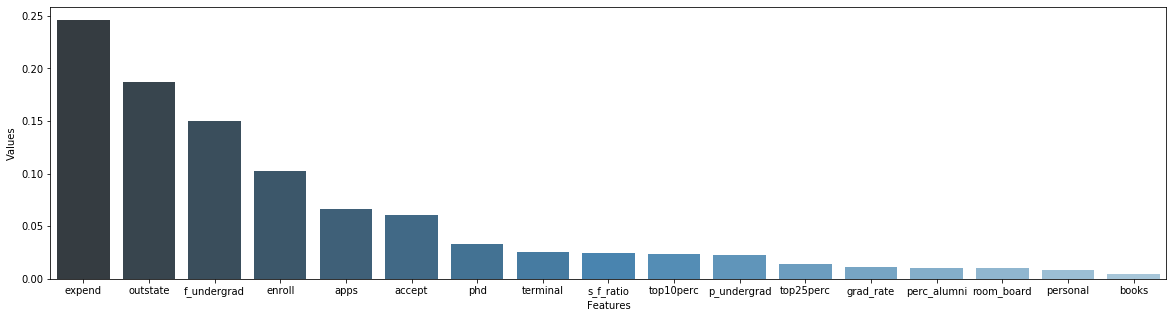

In [15]:
#representing which features are important to the clustering using RandomForest Feature Importance Plot
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 823)
df_dv = df.copy()
df_dv.drop('Cluster', axis = 1, inplace = True)
rfc.fit(df_dv,df['Cluster'])
features = df_dv.columns.tolist()
feature_value = rfc.feature_importances_
d = {'Features' : features, 'Values' : feature_value}
fi = pd.DataFrame(d).sort_values('Values', ascending = False).reset_index()
fi
plt.rcParams['figure.figsize'] = (20.0, 5.0)
ax = sns.barplot(x=fi['Features'], y = fi['Values'], data = fi, palette="Blues_d")

**INFERENCE**
> **expend has the highest significance level followed by outstate**

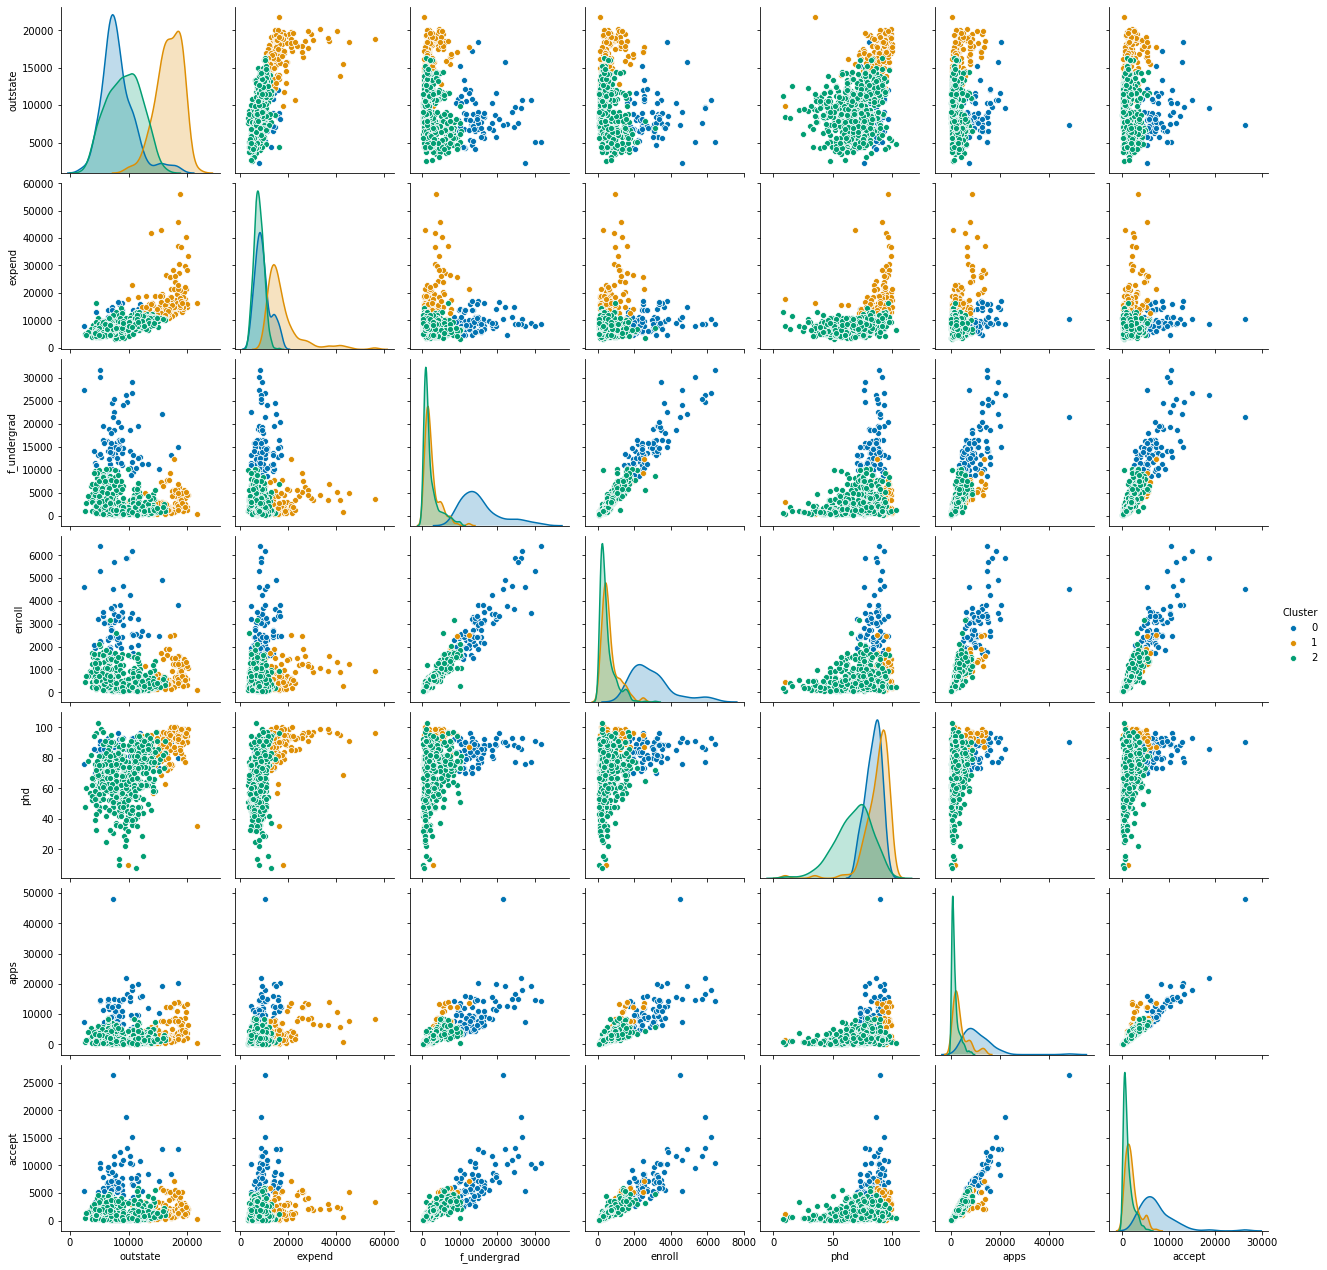

In [16]:
#visualisation of pairplots using top 7 important features for the clusters
sns.pairplot(df[['outstate','expend','f_undergrad','enroll','phd','apps','accept','Cluster']],palette = 'colorblind',hue='Cluster');

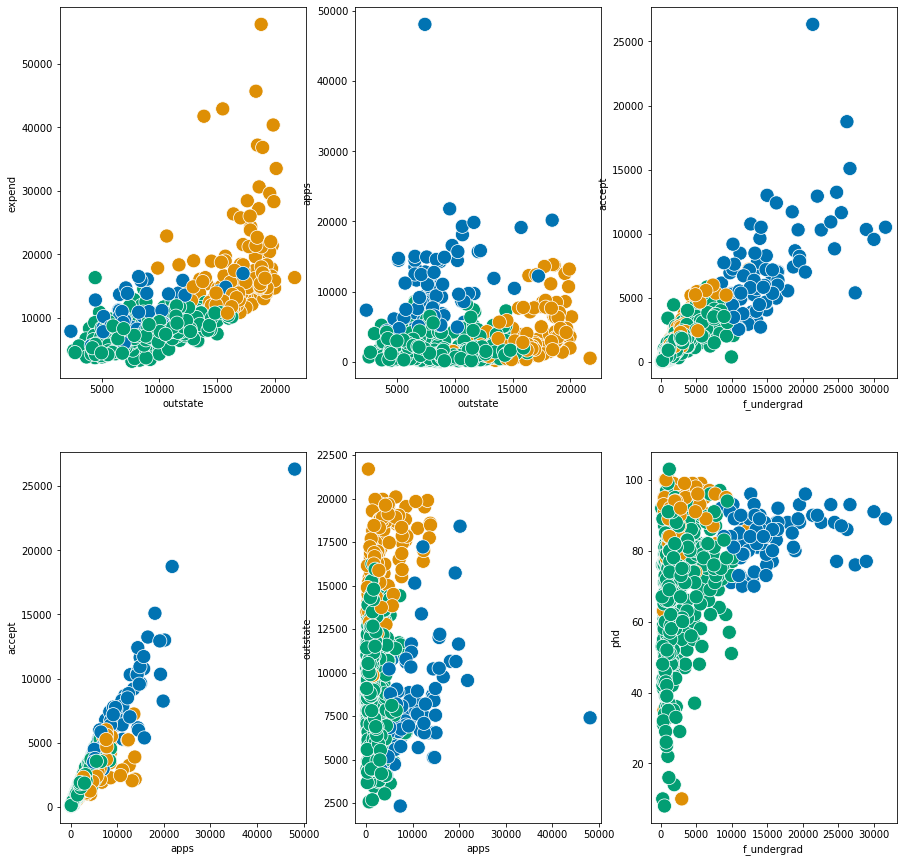

In [17]:
#Some zoomed in biplots
fig, axs = plt.subplots(ncols=3,nrows=2, figsize = (15,15))
sns.scatterplot(x="outstate", y="expend", hue="Cluster",
                     palette = 'colorblind', data = df, legend = False, s = 200, ax=axs[0][0])
sns.scatterplot(x="outstate", y="apps", hue="Cluster",
                     palette = 'colorblind', data = df, legend = False, s = 200, ax=axs[0][1])
sns.scatterplot(x="f_undergrad", y="accept", hue="Cluster",
                     palette = 'colorblind', data = df, legend = False, s = 200,  ax=axs[0][2])
sns.scatterplot(x="apps", y="accept", hue="Cluster",
                     palette = 'colorblind', data = df, legend = False, s = 200, ax=axs[1][0])
sns.scatterplot(x="apps", y="outstate", hue="Cluster",
                     palette = 'colorblind', data = df, legend = False, s = 200, ax=axs[1][1])
sns.scatterplot(x="f_undergrad", y="phd", hue="Cluster",
                     palette = 'colorblind', data = df, legend = False, s = 200,  ax=axs[1][2])


In [34]:
X = df.iloc[:, [7,15]].values    # taking the values of outstate and expend

In [35]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)
kmeans.inertia_

10247487802.071966

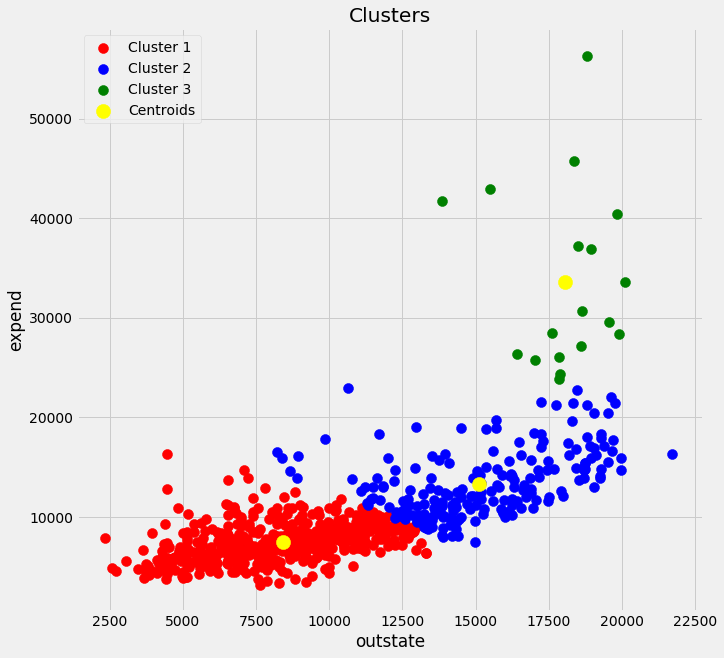

In [36]:
# Visualising the clusters
plt.figure(figsize=(10,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1') #careful
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2') #standard
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3') #careful
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')

plt.title('Clusters')
plt.xlabel('outstate')
plt.ylabel('expend')
plt.legend()
plt.show()

**The dataset has been divided into 3 clusters(private semi government and semi government universities) based on outstate and expend**

# Heirarchical Clustering

## a.) Ward Linkage

In [70]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage


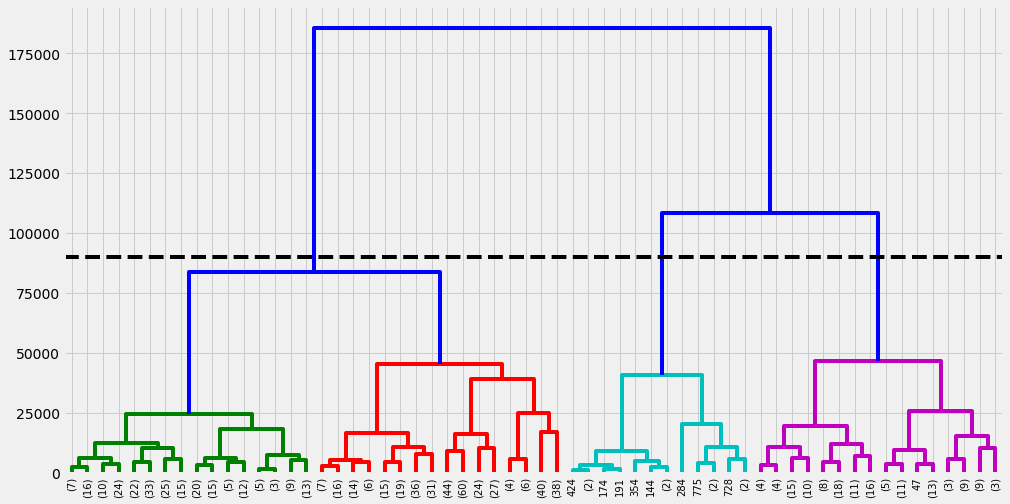

In [74]:
# Using the dendrogram to find the optimal number of clusters(ward linkage)
Z=linkage(X,method="ward")
plt.figure(figsize=(15,8))
dendrogram(Z,leaf_rotation=90,p=5,color_threshold=75000,leaf_font_size=10,truncate_mode='level')
plt.axhline(90000, color='black', linestyle='--')
plt.show()

In [42]:
# Fitting Hierarchical Clustering(ward linkage) to the dataset
from sklearn.cluster import AgglomerativeClustering
hcw = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hcw = hcw.fit_predict(X)

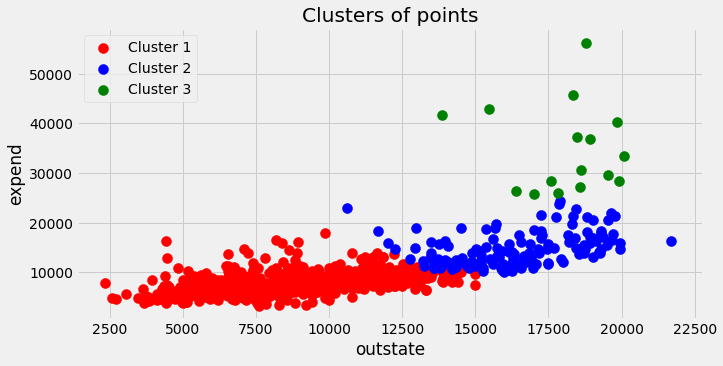

In [60]:
# Visualising the clusters
plt.figure(figsize=(10,5))
plt.scatter(X[y_hcw == 0, 0], X[y_hcw == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hcw == 1, 0], X[y_hcw == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hcw == 2, 0], X[y_hcw == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of points')
plt.xlabel('outstate')
plt.ylabel('expend')
plt.legend()
plt.show()

## b.)Complete Linkage

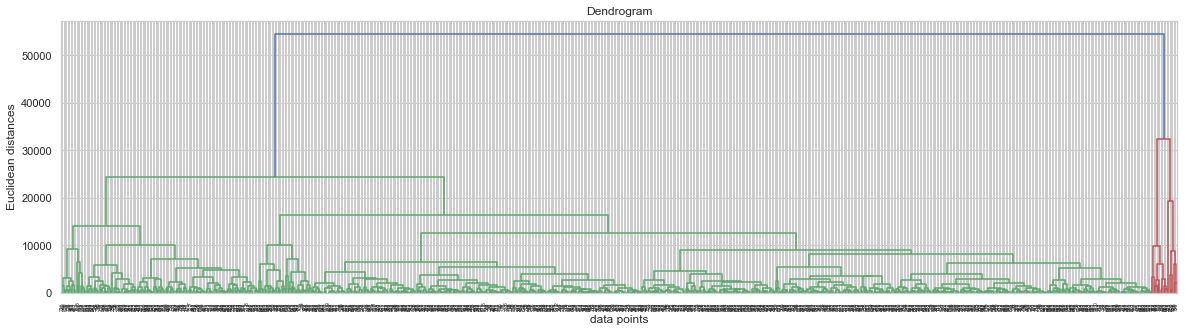

In [220]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'complete'))
plt.title('Dendrogram')
plt.xlabel('data points')
plt.ylabel('Euclidean distances')
plt.show()


In [48]:
from sklearn.cluster import AgglomerativeClustering
hcc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
y_hcc = hcc.fit_predict(X)

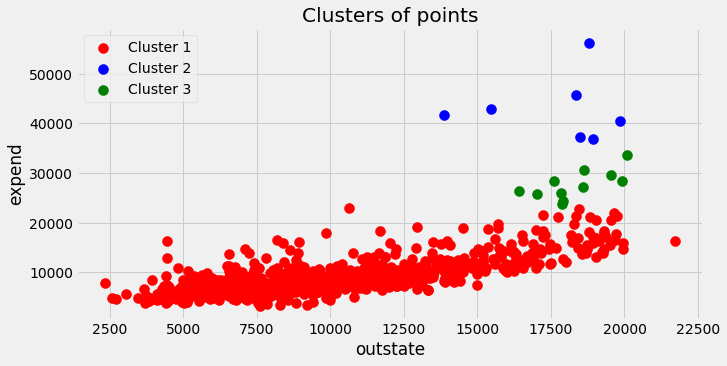

In [59]:
# Visualising the clusters
plt.figure(figsize=(10,5))
plt.scatter(X[y_hcc == 0, 0], X[y_hcc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hcc == 1, 0], X[y_hcc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hcc == 2, 0], X[y_hcc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of points')
plt.xlabel('outstate')
plt.ylabel('expend')
plt.legend()
plt.show()

## c.) Average Linkage

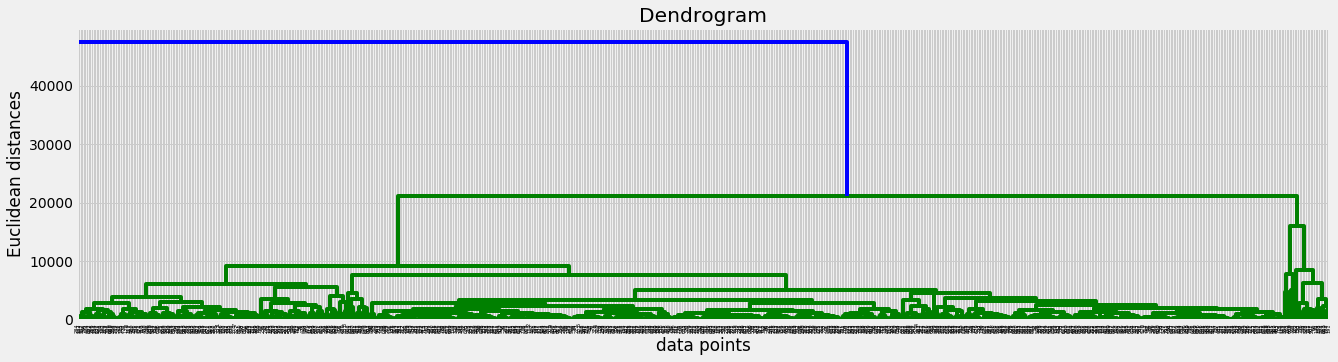

In [50]:
# Using the dendrogram to find the optimal number of clusters(average linkage)
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average'))
plt.title('Dendrogram')
plt.xlabel('data points')
plt.ylabel('Euclidean distances')
plt.show()


In [51]:
# Fitting Hierarchical Clustering(average linkage) to the dataset
from sklearn.cluster import AgglomerativeClustering
hca = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')
y_hca = hcw.fit_predict(X)

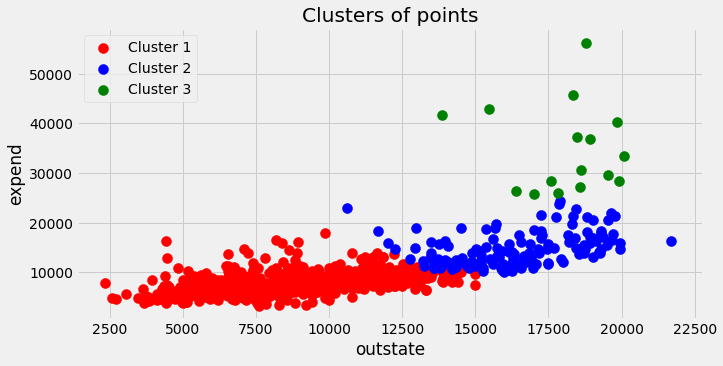

In [58]:
# Visualising the clusters
plt.figure(figsize=(10,5))
plt.scatter(X[y_hca == 0, 0], X[y_hca == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hca == 1, 0], X[y_hca == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hca == 2, 0], X[y_hca == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of points')
plt.xlabel('outstate')
plt.ylabel('expend')
plt.legend()
plt.show()

## d.) Single Linkage

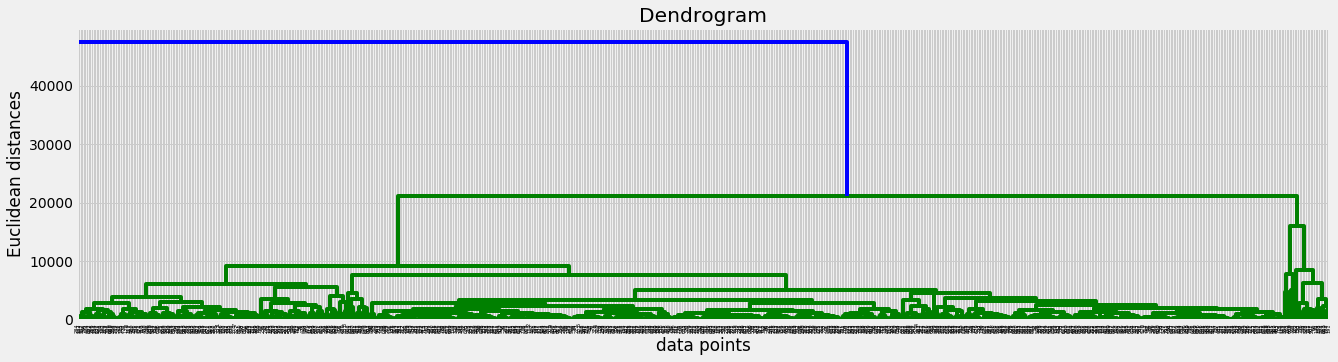

In [53]:
# Using the dendrogram to find the optimal number of clusters(average linkage)
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average'))
plt.title('Dendrogram')
plt.xlabel('data points')
plt.ylabel('Euclidean distances')
plt.show()


In [54]:
# Fitting Hierarchical Clustering(single linkage) to the dataset
from sklearn.cluster import AgglomerativeClustering
hcs = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'single')
y_hcs = hcs.fit_predict(X)

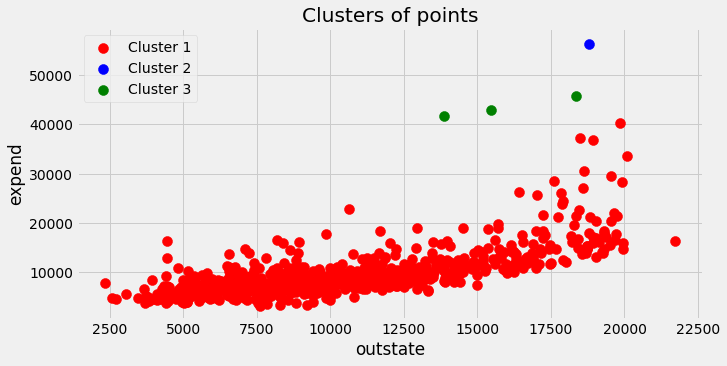

In [57]:
# Visualising the clusters
plt.figure(figsize=(10,5))
plt.scatter(X[y_hcs == 0, 0], X[y_hcs == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hcs == 1, 0], X[y_hcs == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hcs == 2, 0], X[y_hcs == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of points')
plt.xlabel('outstate')
plt.ylabel('expend')
plt.legend()
plt.show()

# PERFORMANCE  MEASURES

## a) Silhouette Analysis

In [81]:
from sklearn.metrics import silhouette_score  
no_of_clusters = [3,4, 5, 6,7] 
silhouette_coeff = []
for n_clusters in no_of_clusters: 
  
    cluster = KMeans(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(X) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(X, cluster_labels) 
    silhouette_coeff.append(silhouette_avg)
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg)

For no of clusters = 3  The average silhouette_score is : 0.5180535853206687
For no of clusters = 4  The average silhouette_score is : 0.4463159680785439
For no of clusters = 5  The average silhouette_score is : 0.43301247116728103
For no of clusters = 6  The average silhouette_score is : 0.37717120366854817
For no of clusters = 7  The average silhouette_score is : 0.4030159023964077


In [84]:
from sklearn.metrics import silhouette_score  
silhouette_coefficients = []
for k in range(3, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter=300, n_init=10)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_coefficients.append(score)

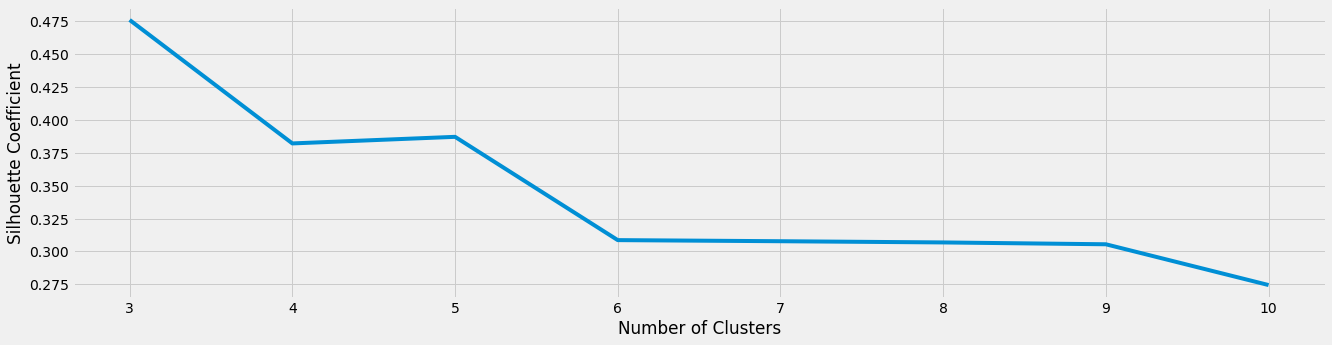

In [85]:
plt.style.use("fivethirtyeight")
plt.plot(range(3,11), silhouette_coefficients)
plt.xticks(range(3,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

**INFERENCE**

>**For no of clusters=3, the value of silhouette_score is maximum.**



## b)Davies-Bouldin Index

In [96]:
from sklearn.metrics import davies_bouldin_score 


In [97]:
#taking 2 clusters
kmeans=KMeans(n_clusters=2,random_state=1).fit(X)
# to store the cluster labels 
klabels = kmeans.labels_ 

print(davies_bouldin_score(X, klabels)) 

0.7245356599170478


In [93]:
#taking 3 clusters
kmeans=KMeans(n_clusters=3,random_state=1).fit(X)
# to store the cluster labels 
klabels = kmeans.labels_ 

print(davies_bouldin_score(X, klabels)) 

0.6745784539460015


In [94]:
#taking 4 clusters
kmeans=KMeans(n_clusters=4,random_state=1).fit(X)
# to store the cluster labels 
klabels = kmeans.labels_ 

print(davies_bouldin_score(X, klabels)) 

0.7033785980240254


In [95]:
#taking 5 clusters
kmeans=KMeans(n_clusters=5,random_state=1).fit(X)
# to store the cluster labels 
klabels = kmeans.labels_ 

print(davies_bouldin_score(X, klabels)) 

0.7160613576797887


**INFERENCE**
> **As the DB index shrinks, the clustering is considered ‘better'.**
>> **Therefore best clusters are obtained when no of clusters are 3 as the DB index is minimum**

**CONCLUSION** : 
> **Using expend and outstate columns , the dataset has been divided into 3 clusters , private, semi government and government universities which help parents and students to decide in which university to apply.**

## THANK YOU!!